In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

# 0. Описать задачу словами

Задача состоит в том, чтобы определить занятость офисного помещения по измерениям освещенности, температуры, влажности и CO2. 

# 1. Прочитать данные

In [53]:
data_raw = pd.read_csv("D:\dataset.csv")

Определим формат переменной data_raw:

In [54]:
type(data_raw)

pandas.core.frame.DataFrame

Выведем наш прочитанный набор данных:

In [55]:
data_raw

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2660,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [56]:
print(data_raw.shape)

(2665, 7)


Итак, наша таблица содержит 2665 строк (объектов) и 7 столбцов (признаков).

Посмотрим на признаки нашей таблицы:

In [57]:
data_raw.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

Посмотрим на первые и последние строки таблицы:

In [58]:
data_raw.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [59]:
data_raw.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2660,2015-02-04 10:38:59,24.290000,25.700000,808.0,1150.25,0.004829,1
2661,2015-02-04 10:40:00,24.330000,25.736000,809.8,1129.20,0.004848,1
2662,2015-02-04 10:40:59,24.330000,25.700000,817.0,1125.80,0.004841,1
2663,2015-02-04 10:41:59,24.356667,25.700000,813.0,1123.00,0.004849,1
2664,2015-02-04 10:43:00,24.408333,25.681667,798.0,1124.00,0.004860,1


Мы видим, что столбцы признаки имеют имена:

- `Date`- дата (год-месяц-день час:минута:секунда)
- `Temperature` - температура в градусах Цельсия
- `Humidity` - относительная влажность, % 
- `Light` - свет, лк
- `Co2` - углекислый газ в ppm
- `HumidityRatio` - влажность, в kgwater-vapor/kg-air
- `Occupancy` - занятость комнаты, 0 или 1, 0 - не занята, 1 - занята

# 2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.

Посмотрим информацию по количественным признакам:

In [60]:
data_raw.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей. Нетрудно видеть, что средние значения больше медианы, значит эти признаки примают чаще меньшие значения, чем большие.

Матрица корреляции имеет вид:

In [61]:
data_raw.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,0.716988,0.768428,0.870226,0.894548,0.705784
Humidity,0.716988,1.000000,0.561905,0.911611,0.951914,0.610764
Light,0.768428,0.561905,1.000000,0.769167,0.693286,0.927949
CO2,0.870226,0.911611,0.769167,1.000000,0.964440,0.768030
HumidityRatio,0.894548,0.951914,0.693286,0.964440,1.000000,0.700330
Occupancy,0.705784,0.610764,0.927949,0.768030,0.700330,1.000000


Матрица ковариации имеет вид:

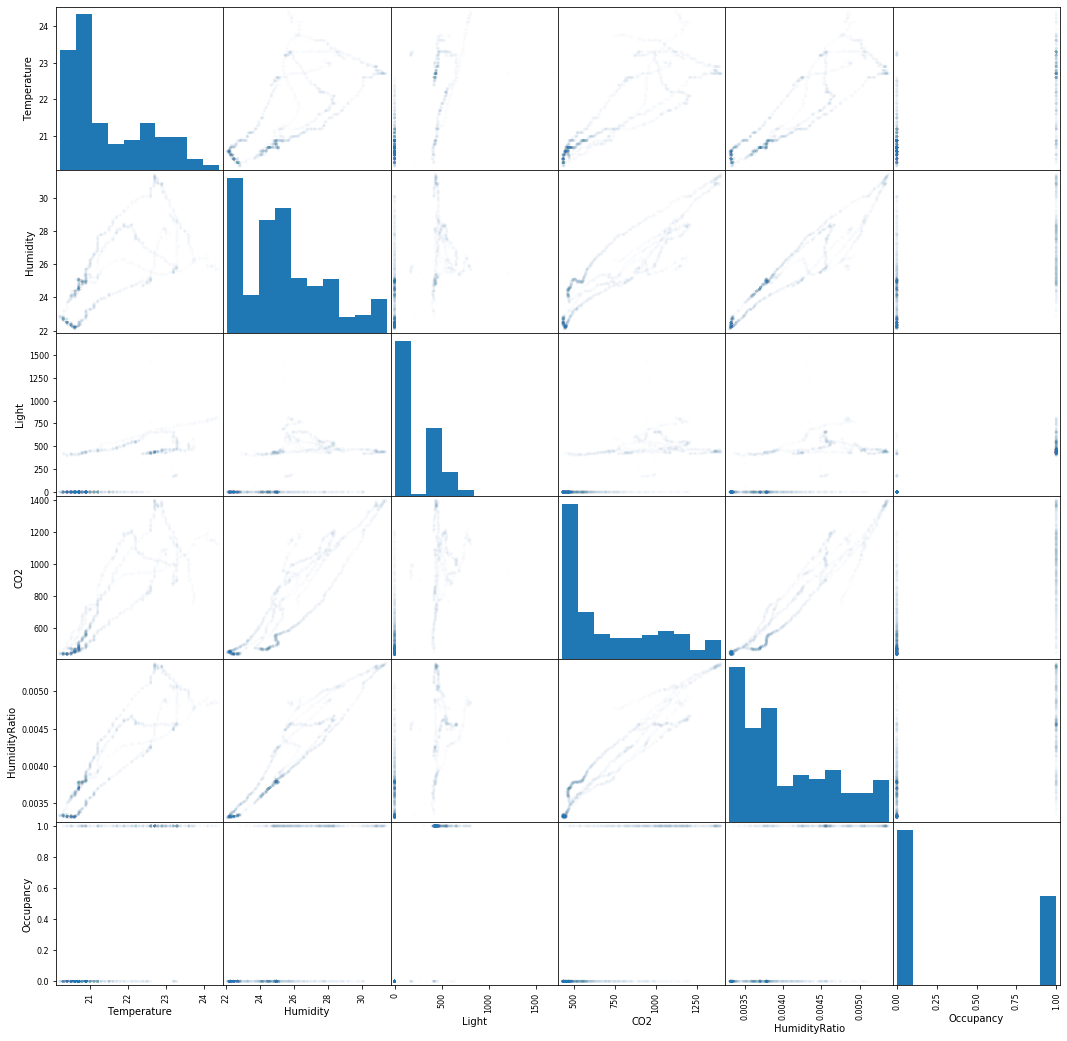

In [62]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw, alpha = .01, figsize = (18, 18))
pass

Посмотрим зависимость С02 от температуры:

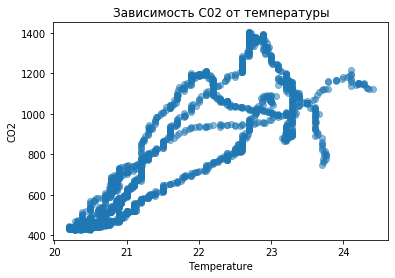

In [63]:
plt.plot(data_raw['Temperature'], data_raw['CO2'], 'o', alpha = 0.5)
plt.xlabel('Temperature')
plt.ylabel('CO2')
plt.title('Зависимость С02 от температуры')
pass

По данному графику можно сделать вывод, что чем больше температура, тем больше СО2.
Построим диаграмму рассеивания для температуры и С02 в зависимости о того, были люди в комнате или нет.

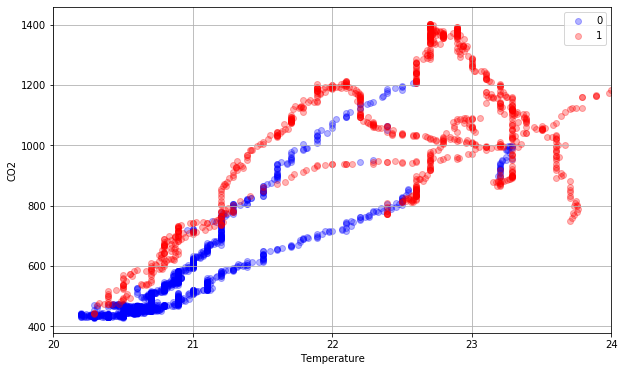

In [64]:
plt.figure(figsize = (10, 6))

plt.scatter(data_raw[data_raw['Occupancy'] == 0]['Temperature'],
            data_raw[data_raw['Occupancy'] == 0]['CO2'],
            alpha = 0.3,
            label = '0',
            color = 'b')

plt.scatter(data_raw[data_raw['Occupancy'] == 1]['Temperature'],
            data_raw[data_raw['Occupancy'] == 1]['CO2'],
            alpha = 0.3,
            label = '1',
            color = 'r')

plt.xlabel('Temperature')
plt.xticks(range(1, 25))
plt.xlim(20, 24)
plt.ylabel('CO2')
plt.legend()
plt.grid()


Из данной диаграммы рассеивания можно сделать вывод, что концентрация С02 выше в наполненном помещнии.
Не трудно заметить, что в наполненном людьми помещении температура и концетрация СО2 выше.

Разделим имеющиеся столбцы на категориальные и на количественные:

In [65]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['date']
['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']


# 3. Обработать пропущенные значения (или убедиться, что их нет)

Найдём медиану по каждому признаку:

In [66]:
data_raw.median(axis = 0)

Temperature       20.890000
Humidity          25.000000
Light              0.000000
CO2              580.500000
HumidityRatio      0.003815
Occupancy          0.000000
dtype: float64

In [67]:
data_raw[numerical_columns].count(axis = 0)

Temperature      2665
Humidity         2665
Light            2665
CO2              2665
HumidityRatio    2665
Occupancy        2665
dtype: int64

Как мы видим, пропущенные значения отсутствуют.

# 4. Обработать категориальные признаки

К небинарными признакам применим метод векторизации, который заключается в следующем.
Признак i, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака i.

In [68]:
categorical_columns = pd.get_dummies(data_raw[categorical_columns])
print(categorical_columns.columns)

Index(['date_2015-02-02 14:19:00', 'date_2015-02-02 14:19:59',
       'date_2015-02-02 14:21:00', 'date_2015-02-02 14:22:00',
       'date_2015-02-02 14:23:00', 'date_2015-02-02 14:23:59',
       'date_2015-02-02 14:25:00', 'date_2015-02-02 14:25:59',
       'date_2015-02-02 14:26:59', 'date_2015-02-02 14:28:00',
       ...
       'date_2015-02-04 10:34:00', 'date_2015-02-04 10:34:59',
       'date_2015-02-04 10:36:00', 'date_2015-02-04 10:37:00',
       'date_2015-02-04 10:38:00', 'date_2015-02-04 10:38:59',
       'date_2015-02-04 10:40:00', 'date_2015-02-04 10:40:59',
       'date_2015-02-04 10:41:59', 'date_2015-02-04 10:43:00'],
      dtype='object', length=2665)


# 5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)

В случае когда входные данные нормализованы, алгоритмы машинного обучения будут работать качественнее. Приведя данные к нулевому среднему значению с единичным квадратичным отклонением, мы получим отмасштабированные данные.

In [69]:
data_numerical = data_raw[numerical_columns]
data_numerical.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


Следует удалить столбец Occupancy, так как его мы будем предсказывать.

In [70]:
data_numerical = data_raw[numerical_columns]
data_numerical = data_numerical.drop(('Occupancy'), axis = 1)
data_core = data_raw['Occupancy']
data_numerical.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027
std,1.028024,2.436842,250.210906,292.681718,0.000611
min,20.200000,22.100000,0.000000,427.500000,0.003303
25%,20.650000,23.260000,0.000000,466.000000,0.003529
50%,20.890000,25.000000,0.000000,580.500000,0.003815
75%,22.356667,26.856667,442.500000,956.333333,0.004532
max,24.408333,31.472500,1697.250000,1402.250000,0.005378


In [71]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()
print(data_numerical.shape)
print (data_numerical.columns)

(2665, 5)
Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')


Cоединим в одну таблицу:

Не будем учитывать столбец data.

In [72]:
data_raw = pd.concat((data_numerical, data_core), axis = 1)
print(data_raw.shape)

(2665, 6)


In [73]:
data_raw.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2.665000e+03,2.665000e+03,2.665000e+03,2.665000e+03,2.665000e+03,2665.000000
mean,3.319024e-13,1.344833e-14,8.348544e-17,1.243950e-16,6.466264e-14,0.364728
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.481444
min,-1.200241e+00,-1.335309e+00,-7.722587e-01,-9.922262e-01,-1.185274e+00,0.000000
25%,-7.625076e-01,-8.592828e-01,-7.722587e-01,-8.606840e-01,-8.148558e-01,0.000000
50%,-5.290501e-01,-1.452440e-01,-7.722587e-01,-4.694740e-01,-3.471171e-01,0.000000
75%,8.976349e-01,6.166709e-01,9.962493e-01,8.146285e-01,8.263135e-01,1.000000
max,2.893373e+00,2.510857e+00,6.011019e+00,2.338183e+00,2.212265e+00,1.000000


In [74]:
data_numerical.count(axis = 0)

Temperature      2665
Humidity         2665
Light            2665
CO2              2665
HumidityRatio    2665
dtype: int64

# 6. Разбить данные на обучающую и тестовую выборки

In [75]:
data_raw

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2.204349,0.376743,1.566568,0.106920,1.207314,1
1,2.221858,0.384130,1.539391,0.145187,1.221232,1
2,2.233531,0.359508,1.516477,0.176848,1.208934,1
3,2.226235,0.316419,1.201077,0.194216,1.173919,1
4,2.256877,0.347197,1.180494,0.208737,1.211295,1
...,...,...,...,...,...,...
2660,2.778265,0.142013,2.457017,1.477180,1.313633,1
2661,2.817175,0.156786,2.464211,1.405259,1.343955,1
2662,2.817175,0.142013,2.492987,1.393642,1.332763,1
2663,2.843114,0.142013,2.477000,1.384075,1.345538,1


Х — все столбцы, за исключением Occupancy.
Y — занятость помещения (Occupancy).

In [76]:
X = data_raw.drop(('Occupancy'), axis = 1)
y = data_raw['Occupancy']
feature_names = X.columns

In [77]:
type(feature_names)

pandas.core.indexes.base.Index

In [78]:
feature_names

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')

In [79]:
X.shape

(2665, 5)

In [80]:
y.shape

(2665,)

In [81]:
N, d = X.shape

In [82]:
type(X)

pandas.core.frame.DataFrame

In [83]:
type(y)

pandas.core.series.Series

Получим обучающающую и тестовую выборку:

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print('Количество обучающих и тестовых данных =  ' + str(N_train) + ' и ' + str(N_test))

Количество обучающих и тестовых данных =  1865 и 800


# 7. Запустить классификатор ближайших соседей

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [86]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

Применим метод predict и посчитаем среднюю ошибку:

In [87]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)


print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0193029490616622
Error test: 0.02


С помощью метода confusion matrix вычислим точность работы классификатора. Элемент матрицы (i, j) равен числу объектов из группы i, а предсказанных в группу j

In [88]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[512  12]
 [  4 272]]


Найдем такое значение параметра k, при котором значение ошибки будет минимальным:

In [89]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print("Минимальная ошибка:" ,best_cv_err, "при к=", best_n_neighbors)

Минимальная ошибка: 0.012332439678284235 при к= 1


Применим алгоритм еще раз для нового параметра k:

In [90]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0
Error test: 0.01


## Домашняя работа 2. Метод главных компонент (PCA)

Применим данный метод для сокращения размерности пространства признаков. Сократив размерность пространства до 2.

In [91]:
from sklearn.decomposition import PCA
pca_two=PCA(n_components = 2)
X_pca_2 = pca_two.fit_transform(X)
X_pca_2.shape

(2665, 2)

Изобразим полученные точки: Синим -комната занята, красным- комната свободна.

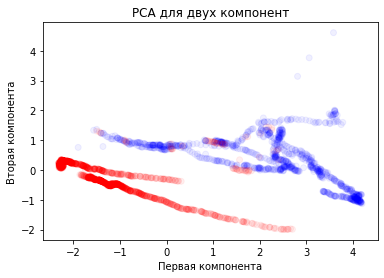

In [92]:
color = []
for i in y:
    if i == 0:
        color.append('red')
    else:
            color.append('blue')
plt.scatter(X_pca_2[:,0],X_pca_2[:,1],c = color, alpha = 0.06)
plt.title('РСА для двух компонент')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
pass

Из полученного графика видно, что метод линейно разделил данные.

Теперь применим РСА с количеством компонент = 5

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X)
X_pca.shape

(2665, 5)

Разобьем данные на тестовую и обучающую выборки:

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.33, random_state = 42)

Обучим классификатор ближайших соседей:

In [95]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [96]:
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.010227272727272727


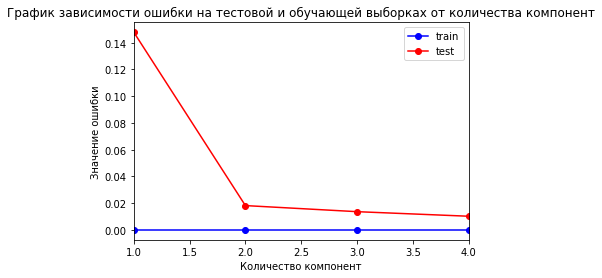

In [97]:
components_arr = np.arange(1, 5, 1)
test_err = []
train_err = []
for components in components_arr:
    pca = PCA(n_components = components)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.33, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train, y_train)
   
    
    train_err.append(np.mean(y_train != knn.predict(X_train)))
    test_err.append(np.mean(y_test  != knn.predict(X_test)))
   
plt.figure()
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('График зависимости ошибки на тестовой и обучающей выборках от количества компонент')
plt.xlabel('Количество компонент')
plt.ylabel('Значение ошибки')
plt.legend()
pass


In [98]:
print("Минимальная ошибка:")
print(np.min(train_err), np.min(test_err))
print("Оптимальное количество компонент:")
print(components_arr[test_err == np.min(test_err)][0])

Минимальная ошибка:
0.0 0.010227272727272727
Оптимальное количество компонент:
4


Минимальная ошибка на тренировочной выборке может быть достигнута при выборе 4 главных компонент, то есть при уменьшении размерности на 1.

##  LDA

In [99]:
from sklearn import discriminant_analysis
y_1=y.astype(int)
lda=discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X,y_1)
X_lda = lda.transform(X)

Разобьем данные на тестовую и обучающую выборки:

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size = 0.33, random_state = 42)

Обучим классификатор ближайших соседей:

In [101]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [102]:
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.025


Таким образом, можно сделать следующие выводы: При использовании метода РСА ошибка на тестовом наборе почти не изменилась(была 0.01, а стала 0.01023), однако благодаря ему мы уменьшили пространство признаков. Используя метод LDA  получили ошибку на тестовом наборе еще хуже(0.025).